Trong lĩnh vực học máy và thị giác máy tính, mạng nơ ron tích chập (CNN) là một trong những công cụ quan trọng nhất được sử dụng để xử lý dữ liệu hình ảnh. Một trong những mạng CNN tiêu biểu là LeNet-5, được phát triển bởi Yann LeCun vào những năm 1990. LeNet-5 đã chứng tỏ hiệu suất tốt trong việc nhận dạng các ký tự trong ảnh .Mặc dù đã ra đời từ những năm 1990, nhưng LeNet-5 vẫn được sử dụng như một mô hình tham chiếu trong nhiều nghiên cứu và cũng là một trong những bước đầu tiên trong việc áp dụng deep learning vào bài toán nhận dạng hình ảnh.

Một trường hợp cụ thể có thể áp dụng LeNet-5 là trong việc nhận dạng chữ số trong ảnh, giống như trong bài toán nhận diện chữ viết với tập dữ liệu MNIST. Đây là một bài toán phân loại đơn giản nhưng rất quan trọng, và LeNet-5 có thể được sử dụng để xây dựng một hệ thống nhận dạng chữ số tự động từ ảnh viết tay.

Vậy, nhiệm vụ của chúng ta là hiểu rõ cách mạng LeNet-5 hoạt động và xem xét cụ thể về lớp tích chập (conv2d) trong mạng này. Chúng ta cần tìm hiểu về cấu trúc của lớp tích chập, cách mà nó áp dụng các bộ lọc (filters) lên hình ảnh đầu vào để trích xuất các đặc trưng và tạo ra các feature maps.

## 1.Cấu trúc và quá trình xử lí dữ liệu của một mạng cnn lenet-5:
Để hiểu cách mạng nơ ron tích chập LeNet-5 hoạt động và xử lý dữ liệu, chúng ta cần phải thảo luận về cấu trúc cụ thể của nó và quá trình xử lý dữ liệu qua từng lớp.

#### Cấu trúc của một mạng cnn lenet-5

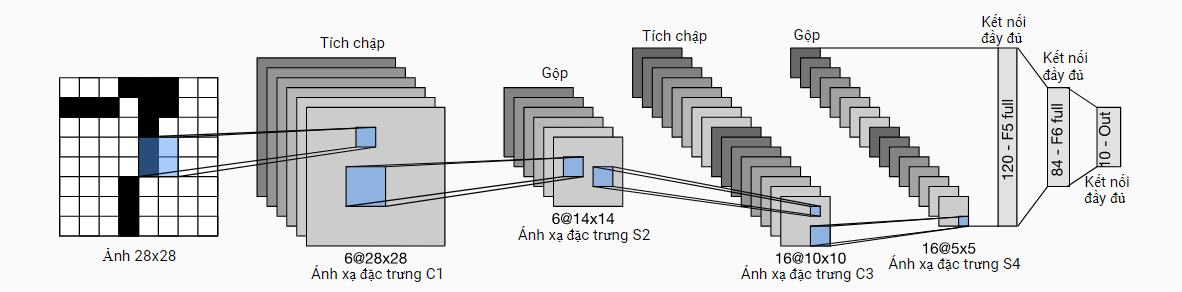

### Quan sát hình minh họa, chúng ta có thể thấy được các lớp:

- Lớp Tích Chập (Convolutional Layer):
Trong LeNet-5, lớp tích chập được sử dụng để trích xuất các đặc trưng từ hình ảnh đầu vào.
Mỗi lớp tích chập sử dụng một tập hợp các bộ lọc (filters) có kích thước nhỏ (ví dụ: 3x3 hoặc 5x5) để quét qua toàn bộ hình ảnh.
Bộ lọc này áp dụng phép tích chập với các vùng nhỏ của hình ảnh, tạo ra các Ánh xạ đặc trưng(feature maps) chứa các đặc trưng cụ thể như cạnh, góc, hoặc texture.

- Lớp Kích Hoạt (Activation Layer):
Sau khi tích chập, các feature maps được đưa qua các hàm kích hoạt không tuyến tính như hàm tanh hoặc hàm ReLU để kích hoạt và làm cho các đặc trưng trở nên phi tuyến tính.

- Lớp Gộp (Pooling Layer):
Lớp gộp (pooling) thường tiếp tục sau lớp tích chập và hàm kích hoạt. Nhiệm vụ của lớp này là giảm kích thước của feature maps, giảm độ phức tạp của mô hình và giảm thiểu lượng tính toán.
Lớp gộp thường sử dụng phép gộp cực đại (max pooling) hoặc phép gộp trung bình (average pooling) trên các vùng không gian nhỏ của feature maps để lấy giá trị lớn nhất hoặc trung bình của từng vùng.

- Lớp Kết Nối Đầy Đủ (Fully Connected Layer):
Sau khi thông qua các lớp tích chập và gộp, các feature maps được duỗi thành một vector và đưa vào các lớp fully connected.
Lớp fully connected thường sử dụng các hàm kích hoạt không tuyến tính như hàm tanh hoặc hàm ReLU để kích hoạt các neuron.
Cuối cùng, một lớp fully connected cuối cùng được sử dụng để đưa ra các dự đoán hoặc phân loại dựa trên các đặc trưng đã học được từ dữ liệu

## 2.Triển khai một mạng cnn lenet-5 cơ bản:
#### 2.1.Nhập các thư viện cần thiết

In [1]:
# TensorFlow là một thư viện cung cấp một cách tiếp cận trừu tượng cho việc định nghĩa, xây dựng và huấn luyện mô hình machine learning, đặc biệt là mạng nơ-ron.
import tensorflow as tf

# Keras cung cấp các module để xây dựng mạng nơ-ron dưới dạng các layer, đơn giản hóa quá trình xây dựng mô hình.
from tensorflow import keras

# Module này trong Keras cung cấp các layers để xây dựng mạng nơ-ron như: convolutional, fully connected, pooling, activation, và nhiều Layer khác.
import keras.layers as layers

# Sequential: Định nghĩa một mô hình tuần tự trong đó các Layer được xếp chồng lên nhau.
# Input: Định nghĩa một cấu trúc của dữ liệu đầu vào cho mô hình(Ma trận 1,2,3D).
# Model: Định nghĩa một mô hình từ các layer cụ thể, cho phép tạo các mô hình có cấu trúc phức tạp hơn.
from tensorflow.python.keras.models import Sequential,Input,Model

# Dense: Định nghĩa một Layers fully connected (hoặc dense) trong mạng nơ-ron.
# Dropout: Là một kỹ thuật regularization, ngẫu nhiên loại bỏ một số neuron trong quá trình huấn luyện để tránh overfitting.
# Flatten: Chuyển đổi các feature map thành vector 1 chiều, thường được sử dụng trước khi đưa vào các layer fully connected.
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU

#### 2.2.Triển khai mạng cnn lenet-5
Đây là cách bạn có thể xây dựng một mạng cnn LeNet-5 cơ bản:

In [2]:
#Khai báo model thuộc class Sequential
model = keras.Sequential()

#Thêm một lớp tích chập(Convolution) với các tham số:
    #filters: Số lượng bộ lọc
    #kernel_size: Kích thước bộ lọc
    #activation: Hàm kích hoạt
    #input_shape: Kích thước dữ liệu được đưa vào
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))

#Thêm một lớp gộp vào mô hình, với tham số pool_size là kích thước lớp gộp
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#Tương tự các bước trên, chỉ thay đổi số lượng bộ lọc
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#Thêm một lớp Flatten, dùng để "Duỗi" feature map thành một vector
model.add(layers.Flatten())

#Thêm một lớp Dense(fully connected), công dụng chính của layer dense là học các đặc trưng từ dữ liệu và biểu diễn một hàm ánh xạ từ dữ liệu đầu vào sang dữ liệu đầu ra.
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))

#Hàm compile trong Keras được sử dụng để cấu hình quá trình huấn luyện của mô hình nơ-ron, với các tham số:
    #loss(hàm mất mát): phần mục tiêu mà mô hình cố gắng tối ưu hóa trong quá trình huấn luyện, nó đánh giá sự khác biệt giữa giá trị dự đoán và giá trị thực tế 
    #optimizer: dùng để chọn thuật toán tối ưu hóa, Thuật toán tối ưu hóa quyết định cách mà các trọng số của mạng nơ-ron được cập nhật
    #metrics: dùng để chọn các chỉ số đánh giá, Chỉ số đánh giá được sử dụng để đo lường hiệu suất của mô hình trong quá trình huấn luyện.
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
#Khi gọi hàm compile, mô hình sẽ được cấu hình với các tham số này để sẵn sàng cho quá trình huấn luyện

### 2.3.Biểu diễn mạng cnn lenet-5 bằng visualkeras

Bạn cũng có thể biểu diễn kiến trúc của mạng cnn lenet-5 thông qua thư viện visualkeras, có thể dễ dàng cài đặt thư viện này với câu lệnh:

- pip install visualkeras

Dưới đây là cách bạn có thể biểu diễn kiến ​​trúc của mạng cnn lenet-5 của mình:

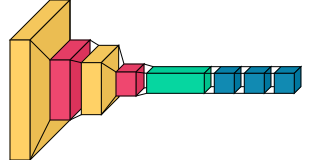

In [3]:
import visualkeras
visualkeras.layered_view(model)

## 3.Quá trình xử lí dữ liệu qua từng lớp
Để hiểu hơn về một mạng cnn lenet-5, chúng ta cũng cần hiểu về quá trình xử lí dữ liệu trong từng lớp của nó

#### 3.1.Quá trình xử lí dữ liệu của lớp tích chập(Convolution Layers)


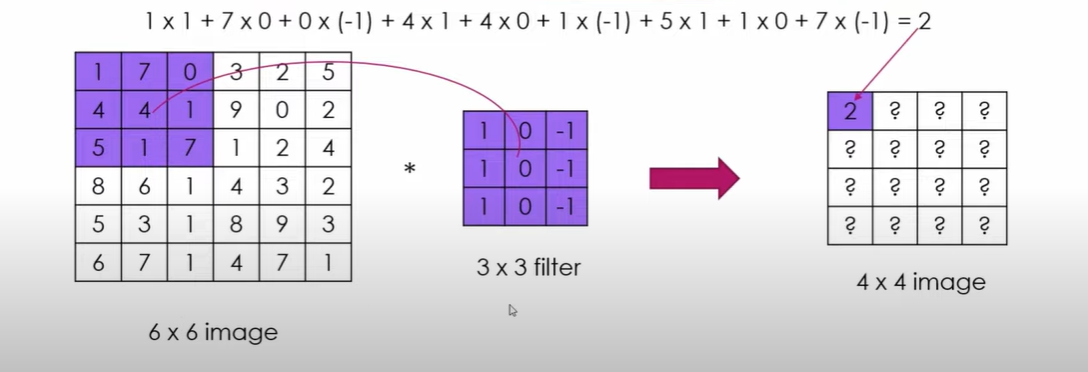

Hình trên biểu diễn quá trình xử lí dữ liệu của một lớp tích chập, giả sử chúng ta có input là một bức ảnh với kích thước 6 * 6, bộ lọc của chúng ta có kích thước 3 * 3', vậy giá trị phần tử đầu tiên của feature maps sẽ là tổng các tích của các phần tử trong tập trên cùng bên trái cùng kích cỡ của bộ lọc với các phần tử có vị trí tương ứng trong bộ lọc.

Giá trị của phần tử có vị trí bên phải phần tử đầu tiên 1 đơn vị sẽ bằng tích của các phần tử trong tập cùng kích cỡ nhưng vị trí đi về bên phải 1 đơn vị với các phần tử tương ứng trong bộ lọc

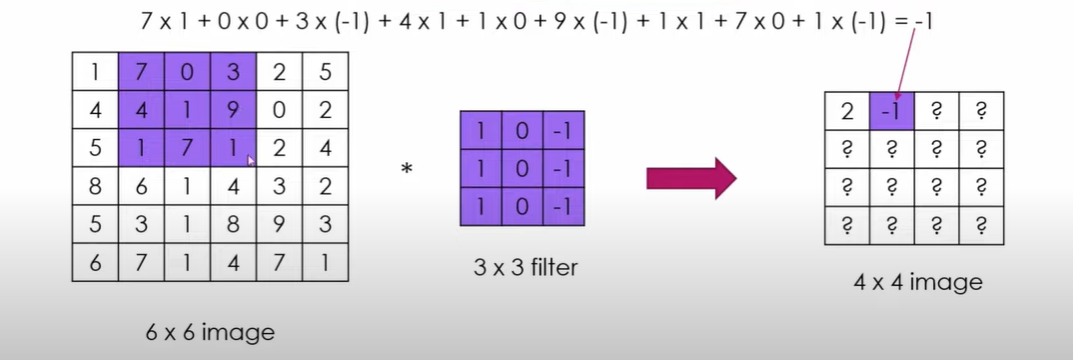

Thực hiện tương tự với các phần tử còn lại, kết quả chúng ta nhận được là một feature maps

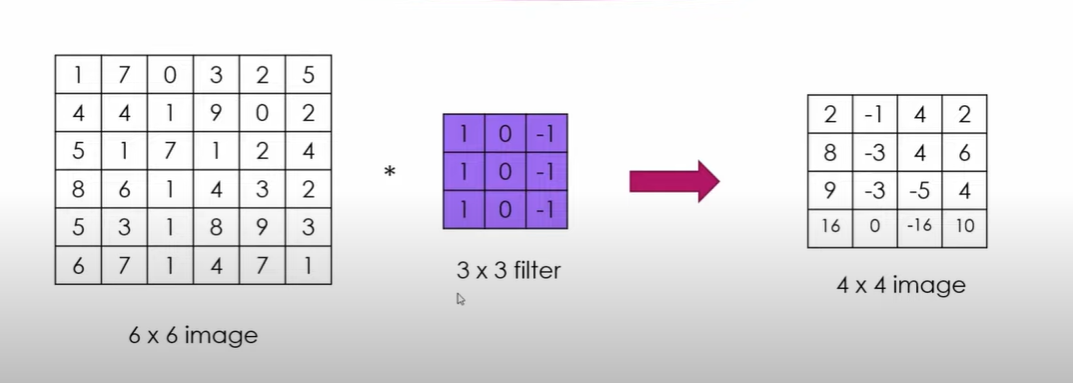

Lưu ý rằng lớp tích chập có thể có nhiều bộ lọc và với mỗi bộ lọc của lớp chúng ta thu được một feature maps khác nhau

Ngoài ra, chúng ta còn một vài khái niệm
- stride(s): bước nhảy, có thể hiểu là đơn vị khoảng cách giữa các phần tử trước và sau được ánh xạ để đưa qua bộ lọc, stride lớn giúp tiết kiệm bộ nhớ và tốc độ nhưng giảm độ chính xác
- padding(p): kỹ thuật tăng kích thước dữ liệu đầu vào bằng cách thêm 1 hoặc nhiều cột/hàng giá trị, giúp cho các phần tử bên trong được tái sử dụng nhiều hơn, padding quá cao sẽ ảnh hưởng đến độ chính xác

Chúng ta có công thức để tìm kích cỡ feature maps thu được là:

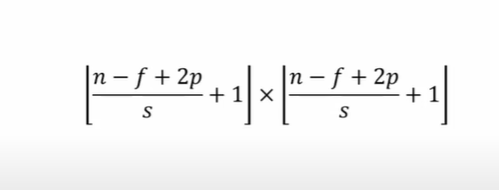

Với:
- n: kích cỡ của ảnh đầu vào
- f: kích cỡ của bộ lọc
- p: kích cỡ của padding
- s: bước nhảy

#### 3.2 Quá trình xử lí dữ liệu của lớp gộp(pooling layers)
Sau khi thu được các feature maps, chúng ta tiếp tục đưa các feature maps đó qua một lớp gộp

Lớp gộp được chia thành hai loại

- Max pooling

- Average pooling

Trong đó max pooling được sử dụng thường xuyên hơn, còn avarage pooling chỉ thường được sử dụng khi nó đã là một lớp rất sâu

Bộ lọc của lớp gộp chỉ có kích thước, không có giá trị cụ thể của từng phần tử nên số lượng feature maps chúng ta thu được sau lớp gộp sẽ không đổi, với giá trị của từng phần tử được tính theo:

- Max pooling: Ánh xạ tương tự với lớp tích chập, nhưng thay vì lấy tổng các tích, chúng ta chỉ cần lấy giá trị lớn nhất trong tập

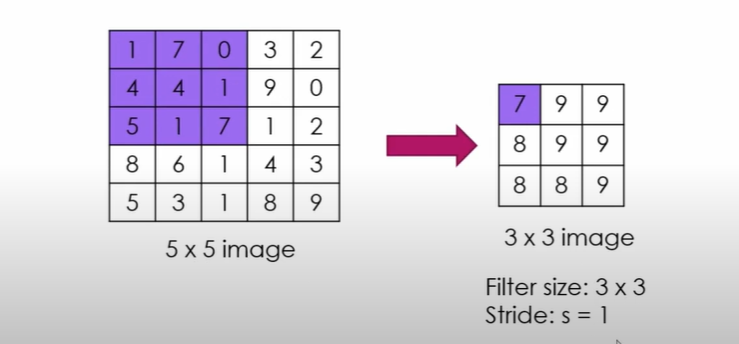

- Average pooling: Ánh xạ tương tự, nhưng lấy giá trị trung bình của các phần tử trong tập

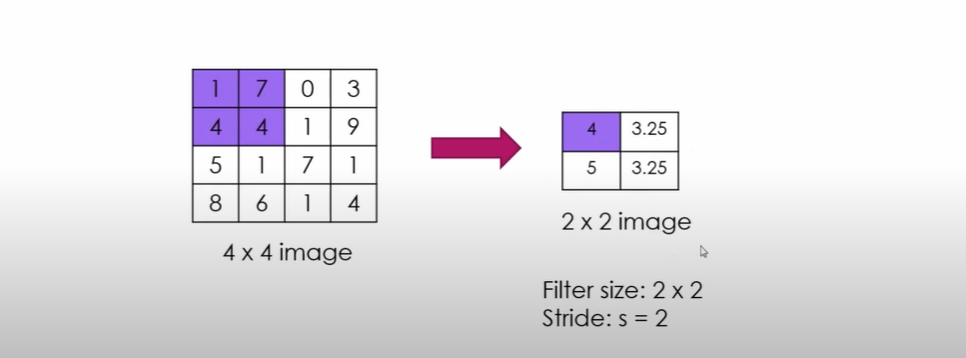

Lớp gộp có các khái niệm stride, padding, công thức giống như lớp tích chập

## Kết luận:
Qua việc phân tích chi tiết về cách mạng nơ ron tích chập LeNet-5 hoạt động và xử lý dữ liệu qua từng lớp, chúng ta có thể hiểu rõ hơn về cách một mạng nơ ron tích chập thực hiện việc trích xuất đặc trưng từ dữ liệu hình ảnh và tạo ra các dự đoán hoặc phân loại cuối cùng. Điều này có thể giúp chúng ta hiểu và tinh chỉnh các mạng CNN cho các ứng dụng nhận dạng và xử lý hình ảnh trong thực tế.